## Support Vector Machine (SVM)

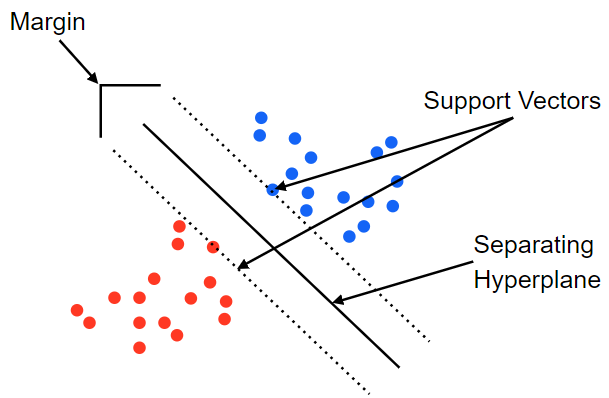

In [1]:
from IPython.display import Image
Image('svm.png')

#### 대략적인 SVM 알고리즘

1. support vector classifier(SVC)은 hyperplane을 사용해서 데이터를 '선형'분리하는 classifier임 
2. hyperplane은 위 그림에서 데이터를 분리하고 있는 직선임 (그림에서는 2차원을 separating하기에 1차원선, 3차원의 hyperplane은 2차원 면)
3. SVM은 선형 분리기인 Support Vector Classifier의 일반화임
4. SVM의 기본 목적인 hyperplane과 데이터의 분류 거리를(margin)을 최대화 하는 것! (maximize the margin)
5. 현실의 데이터는 선형으로 분리하기 어려운 경우가 많음. 그런 경우에는 error를 허용해줌
6. 이론적으로 선형 분리만 가능한 일반 SVM은 hard margin, error를 허용하는 SVM soft margin이라고 불리움

### 1. Import Packages and Modules

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 2. Load Data and EDA

In [3]:
# 13개 변수 / 3개 범주

raw_wine = datasets.load_wine()
print(raw_wine.DESCR) # Dataset Description # 13 Features with 3 Classes

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

### 3. Data Split and Standardization

In [4]:
X = raw_wine.data  # Features
y = raw_wine.target # Target


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Standardization

In [5]:
std_scale = StandardScaler()
std_scale.fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

### 5. SVM

1. SVM은 kernel function을 사용함
2. 고차원 데이터를 선형으로 분리하기 위해 보통 [저차원 데이터를 -> 고차원으로 mapping -> 선형 분리 -> 저차원으로 다시 mapping]
3. 하는 과정을 거침. 여기서 kernel function은 저차원 데이터를 고차원으로 mapping을 쉽게 해주는 함수!
4. 보통 RBF kernel을 많이 사용하는데, 이는 hyper-parameter이기에 상황과 데이터에 맞게 사용하면 됨

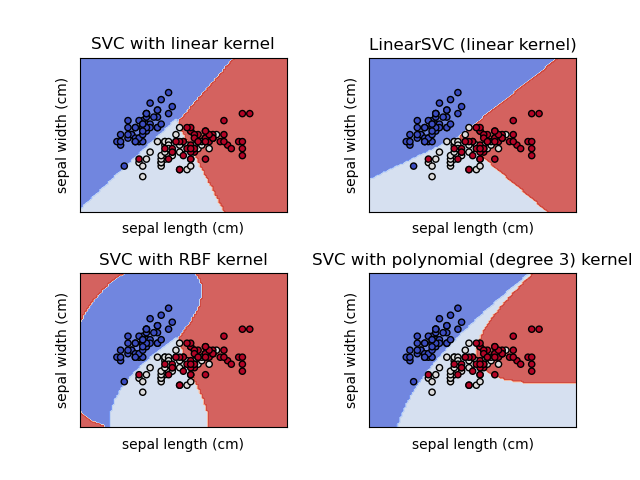

In [6]:
from IPython.display import Image
Image('kernel.png')

In [7]:
# 서포트벡터머신 학습 (Kernel=liner)
from sklearn import svm 
clf_svm_lr1 = svm.SVC(kernel='linear', random_state=0)
clf_svm_lr1.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=0)

In [8]:
# 서포트벡터머신 학습 (Kernel=rbf)
from sklearn import svm 
clf_svm_lr2 = svm.SVC(kernel='rbf', random_state=0)
clf_svm_lr2.fit(X_train_std, y_train)

SVC(random_state=0)

### 7. Predict

In [9]:
# 예측 결과 1
pred_svm1 = clf_svm_lr1.predict(X_test_std)
print(pred_svm1)

# 예측 결과 2
pred_svm2 = clf_svm_lr1.predict(X_test_std)
print(pred_svm2)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2]
[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2]


### 8. Accuracy

In [10]:
# 정확도
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, pred_svm1)
print(accuracy1)

accuracy2 = accuracy_score(y_test, pred_svm2)
print(accuracy2)

1.0
1.0


### 9. Check Confusion Matrix

In [11]:
# confusion matrix 확인 
conf_matrix1 = confusion_matrix(y_test, pred_svm1)
print(conf_matrix1)

conf_matrix2 = confusion_matrix(y_test, pred_svm2)
print(conf_matrix2)

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


### 10. Classification Report

In [12]:
# 분류 레포트 확인
class_report1 = classification_report(y_test, pred_svm1)
print(class_report1)


class_report2 = classification_report(y_test, pred_svm2)
print(class_report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

